In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv('/content/drive/My Drive/AI/archive/Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(['area_type','society','balcony','availability'], axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df2.loc[13296]

location      Cox Town
size             2 BHK
total_sqft        1200
bath               2.0
price            140.0
Name: 13296, dtype: object

In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df3.shape

(13246, 5)

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk'] =  df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-9-2f195ec495ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] =  df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [ ]:
df3.head(40)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [10]:
df3.groupby(['bhk'])['bhk'].sum()

bhk
1       649
2     11054
3     14496
4      5580
5      1765
6      1326
7       700
8       712
9       486
10      140
11       44
12       12
13       13
14       14
16       16
18       18
19       19
27       27
43       43
Name: bhk, dtype: int64

In [11]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [12]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):
  try:
    float(x)
  except:
    return print(x)
  return True

In [14]:
df3[df3['total_sqft'].apply(is_float)].head(36)

2100 - 2850
3067 - 8156
1042 - 1105
1145 - 1340
1015 - 1540
34.46Sq. Meter
1195 - 1440
4125Perch
1120 - 1145
3090 - 5002
1160 - 1195
1000Sq. Meter
1115 - 1130
1100Sq. Yards
520 - 645
1000 - 1285
650 - 665
633 - 666
5.31Acres
30Acres
1445 - 1455
884 - 1116
850 - 1093
716Sq. Meter
547.34 - 827.31
580 - 650
3425 - 3435
1804 - 2273
3630 - 3800
4000 - 5249
1500Sq. Meter
142.61Sq. Meter
1574Sq. Yards
1250 - 1305
670 - 980
1005.03 - 1252.49
3630 - 3800
1004 - 1204
361.33Sq. Yards
645 - 936
2710 - 3360
2830 - 2882
596 - 804
1255 - 1863
1300 - 1405
117Sq. Yards
934 - 1437
980 - 1030
2249.81 - 4112.19
1070 - 1315
3040Sq. Meter
500Sq. Yards
2806 - 3019
613 - 648
704 - 730
1210 - 1477
3369 - 3464
1125 - 1500
167Sq. Meter
1076 - 1199
381 - 535
524 - 894
540 - 670
315Sq. Yards
2725 - 3250
888 - 1290
660 - 700
385 - 440
770 - 841
524 - 894
3Cents
188.89Sq. Yards
1469 - 1766
204Sq. Meter
1255 - 1350
870 - 1080
45Sq. Yards
133.3Sq. Yards
2580 - 2591
613 - 648
2563 - 2733
605 - 624
1349 - 3324
78.03Sq. 

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [15]:
def clean_foot_error(x):
    tokens = x.split('-')
    if len(tokens) == 2:
      a = float(tokens[0])
      b = float(tokens[1])
      x = (a+b)/2
      return x
    try:
      return float(x)
    except:
      return None

In [16]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(clean_foot_error)
df4.head(35)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [17]:
df4.loc[13296]

location      Cox Town
size             2 BHK
total_sqft      1200.0
bath               2.0
price            140.0
bhk                  2
Name: 13296, dtype: object

In [ ]:
df4.loc[30]

In [18]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price'] * 100000/ df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
df5.loc[13296
        ]

location              Cox Town
size                     2 BHK
total_sqft              1200.0
bath                       2.0
price                    140.0
bhk                          2
price_per_sqft    11666.666667
Name: 13296, dtype: object

In [20]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [21]:
location_stats_less_than_10 = location_stats[location_stats<=10]
len(location_stats_less_than_10)

1052

In [22]:
len(df5.location.unique())

1293

In [23]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
type(location_stats)

pandas.core.series.Series

In [25]:
df5.shape


(13246, 7)

In [26]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12502, 7)

In [ ]:
df6.loc[13296]

location              Cox Town
size                     2 BHK
total_sqft              1200.0
bath                       2.0
price                    140.0
bhk                          2
price_per_sqft    11666.666667
Name: 13296, dtype: object

In [ ]:
if pd.isna(df6['price_per_sqft']).any():
    # Print rows where 'price_per_sqft' is NaN
    print(df6[df6['price_per_sqft'].isna()])

In [27]:
len(df6.location.unique())

242

In [28]:
if df6.bhk[1] == 1:
  print("Yes")
else:
  print("no")

no


In [29]:
def remove_outlier(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df], ignore_index=True)
  return df_out

df7 = remove_outlier(df6)
df7.shape

(10241, 7)

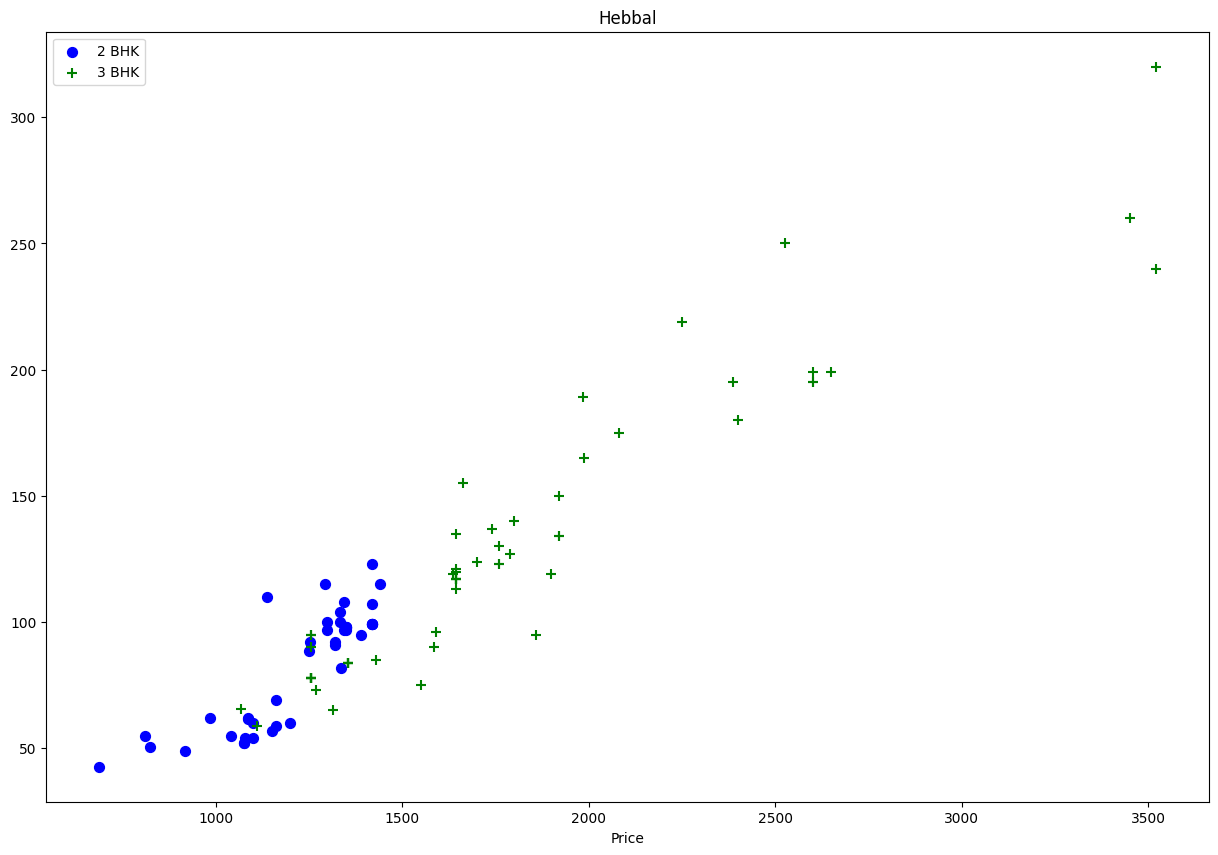

In [30]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figurxe.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft, bhk2.price,color='blue' , label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft, bhk3.price,marker='+', color='green',label='3 BHK',s=50)
  plt.xlabel("Total Square Feet Area")
  plt.xlabel("Price")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df7, "Hebbal")

In [31]:

# def remove_outlier2(df):
#     df_out = pd.DataFrame()

#     for key, loc_df in df.groupby('location'):
#         loc_bhk_df = loc_df.groupby('bhk')
#         list_of_bhk1 = []
#         list_of_bhk2 = []

#         for key, bhk_df in loc_bhk_df:  # Use iterrows to iterate through the inner DataFrame
#             for index, row in bhk_df.iterrows():
#                 if row['bhk'] == 1:
#                     list_of_bhk1.append(row['bhk'])
#                 elif row['bhk'] == 2:
#                     list_of_bhk2.append(row['bhk'])

#         mean_bhk_1 = np.mean(list_of_bhk1) if list_of_bhk1 else 0
#         mean_bhk_2 = np.mean(list_of_bhk2) if list_of_bhk2 else 0

#         reduced_df = pd.DataFrame()

#         for _, row in loc_df.iterrows():
#             if row['bhk'] not in [1, 2]:
#                 reduced_df = loc_df[loc_df['price'] > 1]
#             elif row['bhk'] == 1:
#                 reduced_df = loc_df[loc_df['price'] > mean_bhk_1]
#             else:
#                 reduced_df = loc_df[loc_df['price'] > mean_bhk_2]

#     df_out = pd.concat([df_out,reduced_df], ignore_index=True)
#     return df_out

# # Assuming df7 is your original DataFrame
# df8 = remove_outlier2(df7)
# df8.shape

def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

In [ ]:
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

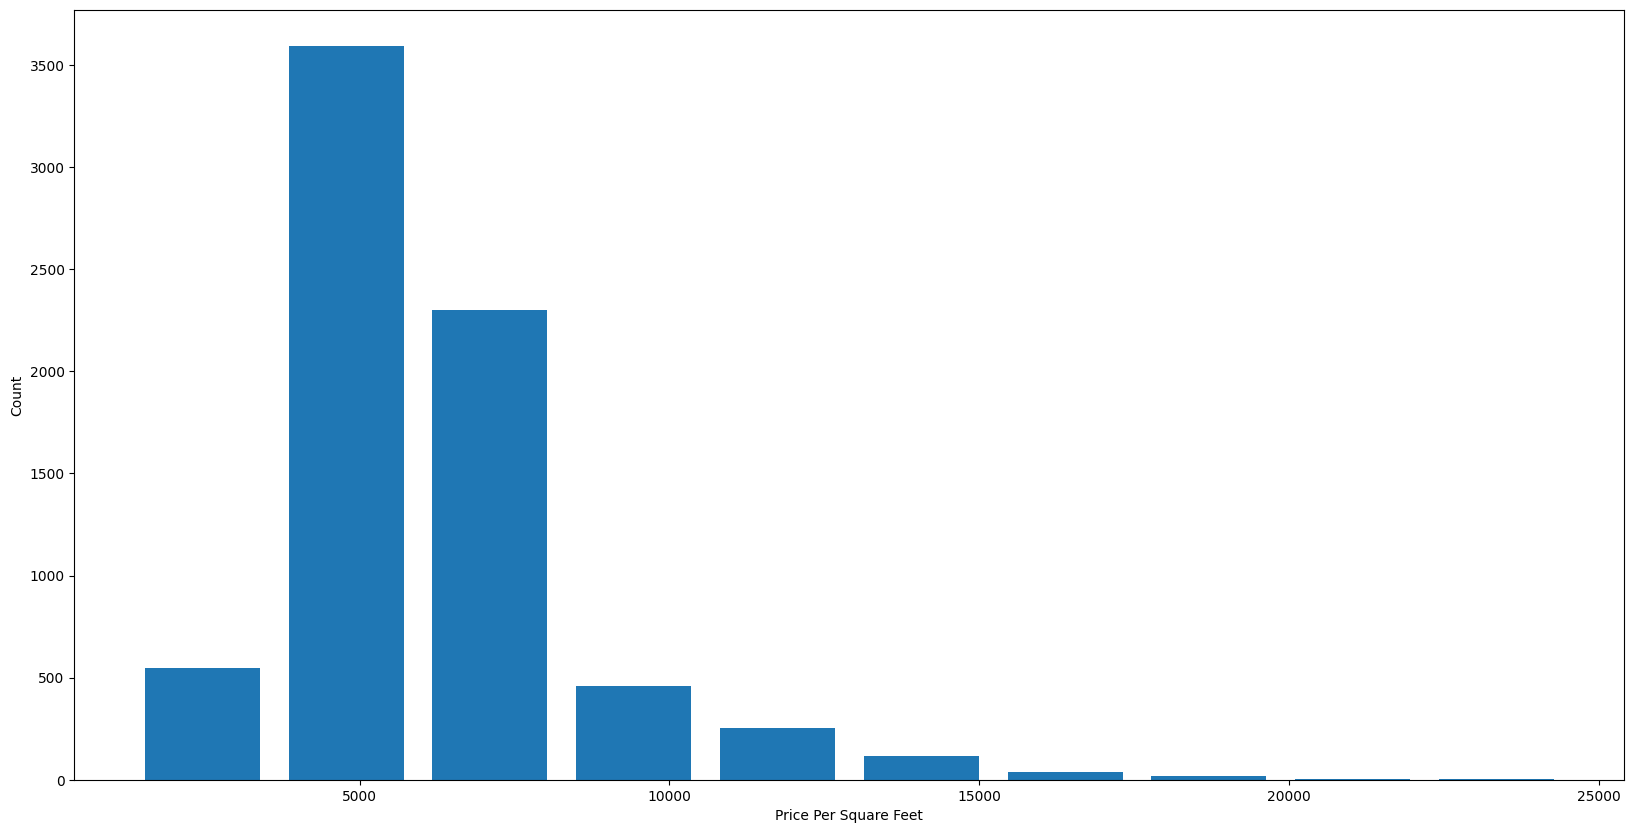

In [32]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')


In [33]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [34]:
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [35]:
df9 = df8[(df8.bath<df8.bhk+2)]
df9.shape


(7251, 7)

In [36]:
df10 = df9.drop(['size','price_per_sqft'], axis=1)
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


Machine learning model

In [37]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df11 = pd.concat([df10,dummies.drop('other', axis='columns')], axis = 1)
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df12 = df11.drop('location', axis = 1)
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X = df12.drop('price', axis=1)
X.shape

(7251, 244)

In [41]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=10)

In [43]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

0.8452277697874376

In [44]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor




In [45]:
def predict_price(location, sqft,bath,bhk):
  loc_index = np.where(X.columns==location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if loc_index >= 0:
    x[loc_index] = 1

  return lr_clf.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

In [47]:
import pickle
with open('banglore_home_price_model.pickle', 'wb') as f:
  pickle.dump(lr_clf,f)

In [48]:
import json
columns = {
    'data_colums' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
  f.write(json.dumps(columns))